# Classification with Bank customer exited or not dataset -tensorflow


In [54]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
from tensorflow import keras 

In [55]:
data= pd.read_csv('../DATA/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
sub_data= data.iloc[:, 3:].copy()
sub_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [58]:
sub_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [59]:
x= sub_data.iloc[:,:-1]
y= data["Exited"]
x.shape, y.shape

((10000, 10), (10000,))

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test= train_test_split(x,y,random_state=42, test_size=0.3)


In [61]:
cat_cols= sub_data.select_dtypes(include=["O"]).columns
num_cols= sub_data.select_dtypes(include=["number"],).drop(labels="Exited", axis=1).columns
num_cols, cat_cols

(Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary'],
       dtype='object'),
 Index(['Geography', 'Gender'], dtype='object'))

## pipeline example with ColumnTransformer
- [Pipeline example 1](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)
- [pipeline example 2](http://onnx.ai/sklearn-onnx/auto_examples/plot_complex_pipeline.html)
- [pipeline with gridSearch](https://jorisvandenbossche.github.io/blog/2018/05/28/scikit-learn-columntransformer/)


In [62]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,Normalizer, MinMaxScaler

cat_transformer= OneHotEncoder(drop="first")
num_transformer= MinMaxScaler() #Normalizer(norm="l2")

preprocessor= ColumnTransformer(transformers=[("cat",cat_transformer, cat_cols), ("num", num_transformer, num_cols)], 
                                remainder="passthrough"
                               )

pipeline= make_pipeline(preprocessor,)

x_train= pipeline.fit_transform(x_train)
x_test= pipeline.transform(x_test)


In [63]:
x_train.shape,y_train.shape

((7000, 11), (7000,))

In [64]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu', input_shape=(11,)))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# callback
callback1= tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=20,mode="max")

# Training the ANN on the Training set
hist1= ann.fit(x_train, y_train, batch_size = 32, epochs = 100, callbacks=[callback1], validation_split=0.25)


Epoch 1/100
165/165 [==============================] - 0s 3ms/step - loss: 0.5076 - accuracy: 0.7910 - val_loss: 0.4907 - val_accuracy: 0.7966
Epoch 2/100
165/165 [==============================] - 0s 1ms/step - loss: 0.4990 - accuracy: 0.7910 - val_loss: 0.4845 - val_accuracy: 0.7966
Epoch 3/100
165/165 [==============================] - 0s 1ms/step - loss: 0.4933 - accuracy: 0.7910 - val_loss: 0.4786 - val_accuracy: 0.7966
Epoch 4/100
165/165 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.7910 - val_loss: 0.4732 - val_accuracy: 0.7966
Epoch 5/100
165/165 [==============================] - 0s 1ms/step - loss: 0.4833 - accuracy: 0.7910 - val_loss: 0.4690 - val_accuracy: 0.7966
Epoch 6/100
165/165 [==============================] - 0s 1ms/step - loss: 0.4792 - accuracy: 0.7910 - val_loss: 0.4640 - val_accuracy: 0.7966
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7910 - val_loss: 0.4579 - val_accuracy: 0.7966

<AxesSubplot:>

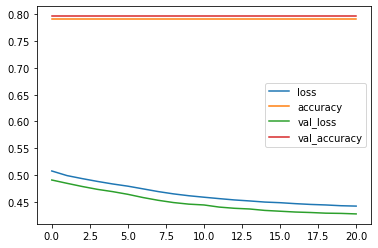

In [65]:
pd.DataFrame(hist1.history).plot()

In [66]:
preds= ann.predict(x_test)
preds= tf.squeeze(tf.cast(preds >0.5,tf.int32)).numpy()

In [67]:
ann.evaluate(x_test, y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.8053


[0.42177197337150574, 0.8053333163261414]

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, preds)

0.8053333333333333

<AxesSubplot:>

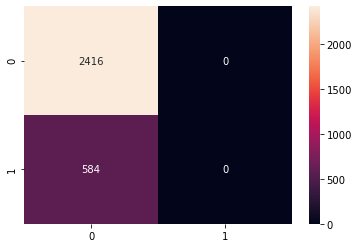

In [69]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt="d")

In [87]:
# Model-2

tf.random.set_seed(42)

# Initializing the ANN
ann2 = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann2.add(tf.keras.layers.Dense(units=6, activation='relu', input_shape=(11,)))

# Adding the second hidden layer
ann2.add(tf.keras.layers.Dense(units=12, activation='relu'))

# Adding the third hidden layer
ann2.add(tf.keras.layers.Dense(units=24, activation='relu'))

# Adding the output layer
ann2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compiling the ANN
ann2.compile(optimizer = tf.keras.optimizers.Adam(0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

# callback
callback2= tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=20,mode="max")

# Training the ANN on the Training set
hist2= ann2.fit(x_train, y_train, batch_size = 32, epochs = 200, callbacks=[callback1], validation_split=0.25)


Epoch 1/200
165/165 [==============================] - 0s 3ms/step - loss: 0.4885 - accuracy: 0.7910 - val_loss: 0.4570 - val_accuracy: 0.7966
Epoch 2/200
165/165 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.7954 - val_loss: 0.4229 - val_accuracy: 0.8183
Epoch 3/200
165/165 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.8107 - val_loss: 0.4090 - val_accuracy: 0.8389
Epoch 4/200
165/165 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8371 - val_loss: 0.3851 - val_accuracy: 0.8429
Epoch 5/200
165/165 [==============================] - 0s 2ms/step - loss: 0.3698 - accuracy: 0.8453 - val_loss: 0.3620 - val_accuracy: 0.8480
Epoch 6/200
165/165 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8486 - val_loss: 0.3762 - val_accuracy: 0.8520
Epoch 7/200
165/165 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8503 - val_loss: 0.3597 - val_accuracy: 0.8503

<AxesSubplot:>

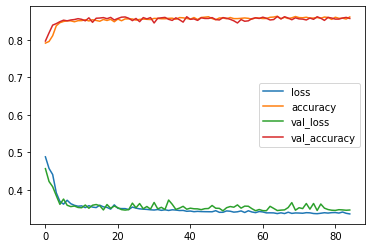

In [88]:
pd.DataFrame(hist2.history).plot()

In [89]:
preds= ann2.predict(x_test)
preds= tf.squeeze(tf.cast(preds >0.5,tf.int32)).numpy()

In [90]:
accuracy_score(y_test, preds)

0.8646666666666667

<AxesSubplot:>

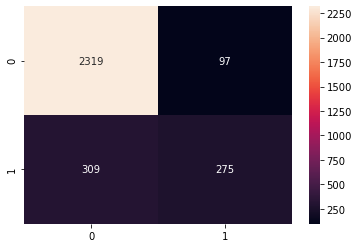

In [91]:

sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt="d")

In [92]:
ann2.evaluate(x_test, y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8647


[0.33473846316337585, 0.8646666407585144]

### we have achieved 86% accuracy from 80% accuracy
### thanks for reading..